data is taken from https://pbpython.com/pandas-pivot-table-explained.html
You can also look at the examples in this link about how to use the pivot_table in different ways.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


# Histogram
good at showing frequency distributions

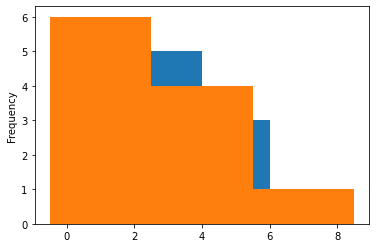

In [66]:
data = pd.Series([0,1,2,3,4,5,2,2,6,3,1])
data.plot.hist(bins=3)
data.plot.hist(bins=[-0.5,2.5,5.5,8.5])
plt.show()

# iloc, loc and related


In [92]:
r  = pd.DataFrame({"a":[1,2,3],"b":[2,2,1],"c":[5,1,2],"d":[1,1,1]}, index=[1,2,3])
r


,a,b,c,d
1,1,2,5,1
2,2,2,1,1
3,3,1,2,1


In [93]:
# use iloc and loc to access data
# iloc is position based, loc is label based.
# use loc and iloc to acess row?
display(r.iloc[0,0])

# r[["a","c"]]
# r.loc[:,"a":"c"]
j=r.iloc[:, 0:2]
print(j)


1

   a  b
1  1  2
2  2  2
3  3  1


In [94]:
# lets do a sum of multiple columns
r.loc[:,"a":"c"].sum(axis=0)

a    6
b    5
c    8
dtype: int64

In [75]:
# select a row with certain column values:
r.loc[r["c"]<3]
r.loc[r["b"].idxmin()]
# r.loc[:,r.loc[1,:]==1]

a    3
b    1
c    2
d    1
Name: 3, dtype: int64

# Adding columns to DataFrame

In [61]:
r["ab"]= r["a"]*r["b"]

r


,a,b,c,d,ab
1,2.5,NaN,5,1.0,NaN
2,2.0,2.0,1,NaN,4.0
3,3.0,1.0,2,1.0,3.0


# About nan values

In [49]:
# let's first creat a toy example with nan values
import numpy as np
r.iloc[0,0] = np.nan
r.iloc[1,3] = np.nan
r.loc[1,"b"] = np.nan

r

,a,b,c,d,ab
1,NaN,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


In [50]:
r.dtypes
r.isnull().sum()
# Lets fill the nan value in column "a" with the mean value of "a"
r["a"].fillna(r["a"].mean(), inplace = True)
# r.loc[:,"b":"d"] = r.loc[:,"b":"d"].fillna(0)
r

,a,b,c,d,ab
1,2.5,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


In [53]:
# drop a row when certain column has nan values
r[r["b"].notnull()]
# drop a row when multiple columns have nan values ""
##r.dropna(subset=['a', 'd'], inplace= True)
r

,a,b,c,d,ab
1,2.5,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


# DataFrame Computation

In [59]:

# r.drop(columns = "b", inplace = True)
display(r)
r[["a","c"]].mul(r["ab"],axis=0)
r[["a","c"]].add(r["ab"],axis=0)
#r[["a","c"]].sub(r["ab"],axis=0)
#r[["a","c"]].div(r["ab"],axis=0)
# temp = pd.Series([1,2,4,5],index=["a","c","d","ab"])
# display(temp)
# display(r.mul(temp,axis=1))

# display(r[["a","c"]].mul(r[["a","ab"]],axis=1)) 
##r.values

,a,b,c,d,ab
1,2.5,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


,a,c
1,4.5,7
2,6.0,5
3,6.0,5


# Groupby functions and piovt_table

In [85]:
df = pd.read_csv("sales.csv")
df.head(10)

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [86]:
df.dtypes
df.isnull().sum()

Account     0
Name        0
Rep         0
Manager     0
Product     0
Quantity    0
Price       0
Status      0
dtype: int64

In [91]:
# check total quantity each manager have 
df.groupby("Manager").sum()["Quantity"]
# check total number of rows in table each manager have 
# df.groupby("Manager").count()["Quantity"]
# df[df["Manager"]=="Debra Henley"]

Manager
Debra Henley     13
Fred Anderson    17
Name: Quantity, dtype: int64

In [89]:
# check total quantity each manager have 
df.pivot_table(values=["Quantity"], index=["Manager"], aggfunc=np.sum)
# aggfunc recommendation: [len,np.sum,np.mean]

,Quantity
Manager,
Debra Henley,13
Fred Anderson,17


Quantity              
Manager     Debra Henley Fred Anderson
Product                               
CPU                  7.0          10.0
Maintenance          4.0           4.0
Monitor              NaN           2.0
Software             2.0           1.0

<AxesSubplot:xlabel='Product'>

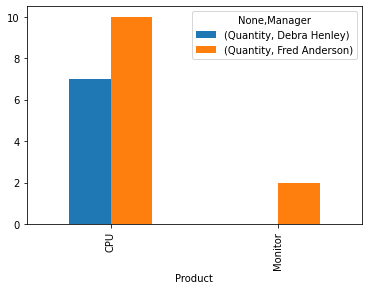

In [90]:
# check total quantity of each product by managers in the table
df_temp =df.pivot_table(values=["Quantity"], index=["Product"], columns = ["Manager"], aggfunc=np.sum)
display(df_temp)
df_temp.loc[["CPU","Monitor"]].fillna(0).plot.bar()

# df.pivot_table(values=["Quantity"], index=["Product","Status"], columns = ["Manager"], aggfunc=np.sum)


In [36]:
# check the number of records(Accounts) of each product by managers in the table
df.pivot_table(values=["Account"], index=["Manager"], columns = ["Product"], aggfunc=len)

Account                             
Product           CPU Maintenance Monitor Software
Manager                                           
Debra Henley      5.0         2.0     NaN      2.0
Fred Anderson     4.0         2.0     1.0      1.0

In [84]:
# find the minimal price of each product by managers in the tableS
df.pivot_table(values=["Price"], index=["Manager"], columns = ["Product"], aggfunc=min)

Price                             
Product            CPU Maintenance Monitor Software
Manager                                            
Debra Henley   30000.0      5000.0     NaN  10000.0
Fred Anderson  30000.0      5000.0  5000.0  10000.0

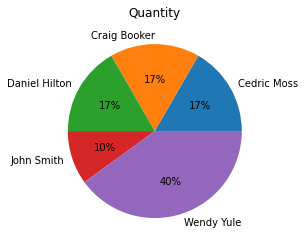

In [38]:
fig, ax = plt.subplots()
# df.groupby("Rep").sum()["Quantity"].plot.pie()
ax.set_title('Quantity')

df.groupby("Rep").sum()["Quantity"].plot.pie(autopct='%.0f%%')
ax.get_yaxis().set_visible(False)
